In [27]:
!pip3 install matplotlib pandas

In [1]:
!pip3 install seaborn 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

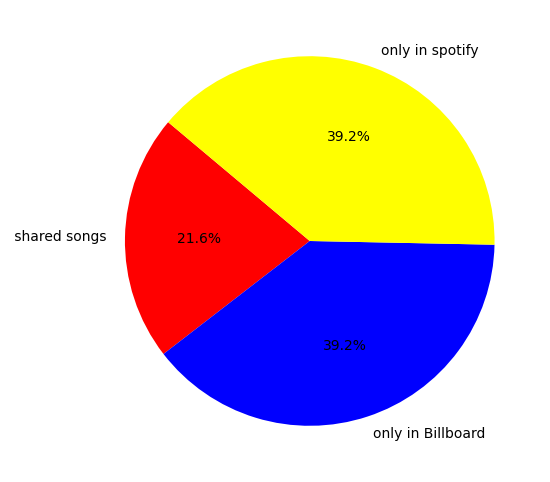

Percentage of Songs with the same rank: 35.50%
Average placement difference: 30.41


In [83]:
billboard_df= pd.read_csv("Billboard-global-weekly-2024-08-10.csv", sep= ";")
spotify_df= pd.read_csv("regional-global-weekly-2024-08-08.csv")


# print(billboard_df.columns)
# print(spotify_df.columns)
billboard_df = billboard_df[["rank","artist_names","track_name","previous_rank","peak_rank","weeks_on_chart"]]
spotify_df = spotify_df[["rank","artist_names","track_name", "previous_rank","peak_rank", "weeks_on_chart"]]

shared_songs = pd.merge(billboard_df,spotify_df, on = ["artist_names","track_name"], suffixes=("_billboard", "_spotify"))
similar_per = len(shared_songs)/ len(billboard_df) * 100

labels = [" shared songs","only in Billboard", "only in spotify"]
sizes= [len(shared_songs), len(billboard_df)-len(shared_songs),len(spotify_df)-len(shared_songs)]


plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors= ["red","blue","yellow"], startangle=140)
#"Percentage match of songs"
plt.show()

print(f"Percentage of Songs with the same rank: {similar_per:.2f}%")

shared_songs["Rank_Differ"] = abs(shared_songs["rank_billboard"]- shared_songs["rank_spotify"] )
avg_rank_diff = shared_songs["Rank_Differ"].mean()

print(f"Average placement difference: {avg_rank_diff:.2f}")



shared artist: 102
artist only in Billboard: 57
Künstler only in Spotify: 51


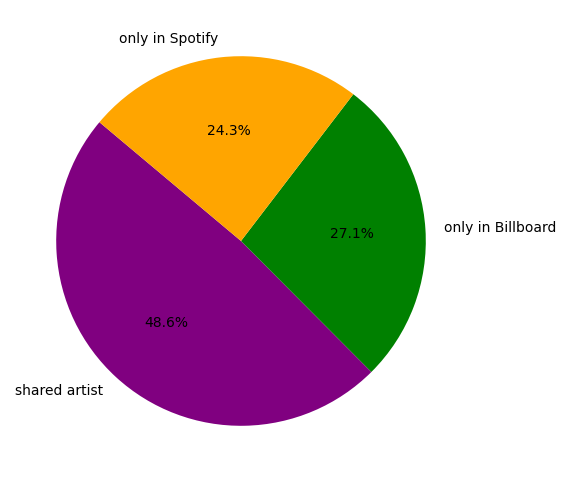

In [73]:
billboard_artist = set(billboard_df["artist_names"])
spotify_artist = set(spotify_df["artist_names"])
repeated_artist = billboard_artist.intersection(spotify_artist)
unrepeted_billboard_artist = billboard_artist-spotify_artist
unrepeted_spotify_artist= spotify_artist - billboard_artist

labels = ["shared artist", "only in Billboard", "only in Spotify"]
sizes = [len(repeated_artist), len(unrepeted_billboard_artist), len(unrepeted_spotify_artist)]


print(f"shared artist: {len(repeated_artist)}")
print(f"artist only in Billboard: {len(unrepeted_billboard_artist)}")
print(f"Künstler only in Spotify: {len(unrepeted_spotify_artist)}")

#artist
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=["purple", "green", "orange"], startangle=140)
#Artist overlap between Billboard & Spotify
plt.show()

In [84]:
import seaborn as sns 
import plotly.express as px

billboard_df = billboard_df[["rank","artist_names","track_name","previous_rank","peak_rank","weeks_on_chart"]]
spotify_df = spotify_df[["rank","artist_names","track_name", "previous_rank","peak_rank", "weeks_on_chart"]]



spotify_df.rename(columns={'rank': 'rank_spotify', 'weeks_on_chart': 'weeks_spotify', "previous_rank": "previous_spotify", "peak_rank":"peak_spotify"}, inplace=True)
billboard_df.rename(columns={'rank': 'rank_billboard', 'weeks_on_chart': 'weeks_billboard',  "previous_rank": "previous_billboard","peak_rank":"peak_billboard"}, inplace=True)

rank_df = pd.merge(spotify_df,billboard_df, on= ["track_name","artist_names"], how ="inner", suffixes=("_billboard", "_spotify"))

correlations = {
    "Ranking": rank_df["rank_spotify"].corr(rank_df["rank_billboard"]),
    "weeks_on_chart": rank_df["weeks_spotify"].corr(rank_df["weeks_billboard"]),
    "Previous Rank": rank_df["previous_spotify"].corr(rank_df["previous_billboard"]),
    "Peak Rank": rank_df["peak_spotify"].corr(rank_df["peak_billboard"])
}
fig= px.scatter(
    rank_df,
    x= "rank_spotify",
    y = "rank_billboard",
    title = f"correlation: {correlations['Ranking']:.2f}",
    labels={"rank_spotify": "Spotify Rank", "rank_billboard": "Billboard Rank"}
)


fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": f"Ranking (r= {correlations["Ranking"]:.2f})",
                    "method": "update",
                    "args": [{"x": rank_df["rank_spotify"], "y": rank_df["rank_billboard"]},
                             {"title": f"Ranking Correlation: {correlations['Ranking']:.2f}"}]
                },
                {
                    "label":  f"Weeks (r = {correlations['weeks_on_chart']:.2f})",
                    "method": "update",
                    "args": [{"x": rank_df["weeks_spotify"], "y": rank_df["weeks_billboard"]},
                             {"title": f"Weeks Correlation: {correlations['weeks_on_chart']:.2f}"}]
                },
                {
                    "label": f"Previous Rank (r = {correlations['Previous Rank']:.2f})",
                    "method": "update",
                    "args": [{"x": rank_df["previous_spotify"], "y": rank_df["previous_billboard"]},
                             {"title": f"Previous Rank Correlation: {correlations['Previous Rank']:.2f}"}]
                },
                {
                    "label": f"Peak Rank (r = {correlations['Peak Rank']:.2f})",
                    "method": "update",
                    "args": [{"x": rank_df["peak_spotify"], "y": rank_df["peak_billboard"]},
                             {"title": f"Peak Rank Correlation: {correlations['Peak Rank']:.2f}"}]
                }
            ],
            'direction': 'down',
            'showactive': True
        }
    ]
)

# the normal correlation 
# correlation_songs_and_rank = shared_songs["rank_billboard"].corr(shared_songs["rank_spotify"])
# print(f"correlation between Billboard & Spotify-Rankings: {correlation_songs_and_rank:.2f}")

# plt.figure(figsize=(8,6))
# sns.scatterplot(data=shared_songs, x ="rank_billboard", y= "rank_spotify", alpha = 0.6)
# plt.xlabel("Billboard_Rank")
# plt.ylabel("Spotify_Rank")
# plt.show()
fig.show()